<h1><center><b>Linear Regression Algorithm</b></center></h1>

Linear Regression Algorithm is a very popular algorithm in Supervised Learning and part of the Regression category.
It basically uses the linear formula to create a straight line which can be used then to make predictions where the prediction will be a  continuous value. 

Linear Regression can have many features (X1...Xn) also knowns are independent variables , which are used to calculate the prediction
as a single label Y which is also known as the dependent variable , which will be the prediction.

The linear formula is as it follows:

<h3><center>Y = <i>w</i>X + <i>b</i> </h3></center>

However when dealing with linear regression its very likely that we will be using many features rather than one.

Here is the formula that deals with many features:

<h3><center>Y = <span style="text-decoration: overline;">w</span> &middot; <span style="text-decoration: overline;">X</span> + b</center></h3>

w in this case will be a vector and X a matrix and the dot in the middle will stand for dot product

My Python implementation of the Linear Regression:

Libraries that will be used:

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I have done it using a Object Oriented Design to make a familiar code to the one in Scikit-learn:

In [219]:
class LinearRegressionMult:
    #Constructor, initializing the class variables that will be used
    def __init__(self):
        self.w = None
        self.b = None
        self.X_mean = None
        self.X_std = None
        self.y_mean = None
        self.y_std = None

In [180]:
    def linearFormula(self, data_x, w, b):
            """
            ---data_x: vector (m,n) m->number of rows (training examples), n->number of columns (number of features),
            the data that will be used wether for training and predictions
            ---w: weight, vector (n,),  represents the coefficient or slope of the independent variable (X), will have same number of columns as X 
            ---b: bias, scalar, represents the y-intercept of the linear regression model.
            Linear formula used as shown above
            """
            return np.dot(data_x, w) + b

I have used a Z normalization in my implementation due to having learned it in University too.
<ul>
        <li>
            <math xmlns="http://www.w3.org/1998/Math/MathML">
                <mi>x</mi>
            </math>
            is the original data point.
        </li>
        <li>
            <math xmlns="http://www.w3.org/1998/Math/MathML">
                <mi>μ</mi>
            </math>
            is the mean of the data.
        </li>
        <li>
            <math xmlns="http://www.w3.org/1998/Math/MathML">
                <mi>σ</mi>
            </math>
            is the standard deviation of the data.
        </li>
        <li>
            + 1e-8, has been added to avoid division by 0
        </li>
    </ul>
Denormalization formula used to get the values back especially after predictions.


In [183]:
    #Normalization will be used for scaling variables in a similar range in this case
    def z_normalize(self, X):
            self.X_mean = np.mean(X, axis=0)
            self.X_std = np.std(X, axis=0)
            #small number to avoid zero (NaN error!)
            return (X - self.X_mean) / (self.X_std + 1e-8)
    def z_normalize_y(self, y):
            self.y_mean = np.mean(y)
            self.y_std = np.std(y)
            return (y - self.y_mean) / (self.y_std + 1e-8)
    
    def z_denormalize_y(self, y_norm):
            return y_norm * self.y_std + self.y_mean

I will be using <bold> Squared Mean Error </bold> as my loss function in the cost function.
Formula as follows:

<img src="https://suboptimal.wiki/images/mse_5.jpg" alt="mse_5.jpg" width="500">


<center>Cost Function using Regularization and Vectorization:</center>

In [187]:
    def cost_function(self, x, y, w, b, lambda_):
        m = x.shape[0]
        fwb = self.linearFormula(x, w, b)
        cost = np.sum((fwb - y) ** 2) / (2 * m)
        reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
        return cost + reg_cost
    

<center>Cost Function using Regularization: </center>

In [190]:
    def cost_functionNV(self, x, y, w, b, lambda_):
        m = x.shape[0]
        cost = 0
        fwb = np.zeros_like(y)
        for i in range(m):
            predictions[i] = self.linearFormula(x[i], w, b)
            cost += (fwb[i] - y[i]) ** 2
        
        cost = np.sum(cost) / (2 * m)
        
        reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
        
        total_cost = cost + reg_cost
        
        return total_cost


Now i will be implementing the **Gradiant Descent** algorithm (Vectorized and using regularization) which will find and optimize the best w and b to make correct predictions with minimized loss. </br>
Formula below: </br>
<img src="Images/Linear_Reg_Gradient_Descent.png" alt="mse_5.jpg" width="500">

In [193]:
    def gradientDescent(self, features, labels, alpha, attempts, lambda_):
        """
        features: vector (m,n) m->number of rows (training examples), n->number of columns (number of features),
            the data that will be used wether for training and predictions
        labels: (m,) containing the target values for each training example.
        alpha: learning rate given by used or used the default one, 
        a scalar value that determines the step size in gradient descent or other optimization algorithms.
        lambda_: given by user or used the default one,
        a scalar value used in regularization to penalize large coefficients in models.
        """
        m , n = features.shape
        w = np.zeros(n)
        b = 0
        J_history = []
    
        for a in range(attempts):
            predictions = self.linearFormula(features, w, b)
            loss = predictions - labels
            #Regularization used only for w
            dj_dw = (np.dot(features.T, loss) + lambda_ * w) / m
            dj_db = np.sum(loss) / m 
    
            w -= alpha * dj_dw
            b -= alpha * dj_db
    
            cost = self.cost_function(features, labels, w, b, lambda_)
            J_history.append(cost)
    
            if a % 2000 == 0:
                print(f"Iteration {a}, Cost: {cost}")

    return w, b, J_history

**Gradiant Descent** algorithm (**Not** Vectorized and using regularization)

In [196]:
    def gradientDescentNV(self, features, labels, alpha, attempts, lambda_):
        m , n = features.shape
        w = np.zeros(n)
        b = 0
        J_history = []
    
        for a in range(attempts):
            predictions = np.zeros(m)
            dj_dw = np.zeros(n)
            dj_db = 0
            for i in range(m):
                predictions[i] = self.linearFormula(features[i], w, b)
                loss = predictions[i] - labels[i]
                dj_db += loss
                for j in range(n):
                    dj_dw[j] += loss * features[i,j]
                    
            dj_db /= m
            dj_dw /= m
            
            dj_dw += (lambda_ / m) * w
            
            w -= alpha * dj_dw
            b -= alpha * dj_db
    
            cost = self.cost_function(features, labels, w, b, lambda_)
            J_history.append(cost)
    
            if a % 2000 == 0:
                print(f"Iteration {a}, Cost: {cost}")
                
        return w, b, J_history

Fit method as seen in Scikit-learn, which is used to get the best possible W and B

In [199]:
    def fit(self, features, labels, alpha=0.01, attempts=10000, lambda_=0):
            X_scaled = self.z_normalize(features)
            y_scaled = self.z_normalize_y(labels)
    
            self.w, self.b, self.j = self.gradientDescent(X_scaled, y_scaled, alpha, attempts, lambda_)
            return self.w, self.b, self.j

Predict method to predict the continuous value

In [202]:
    def predict(self, predict_values):
            X_scaled = (predict_values - self.X_mean) / (self.X_std + 1e-8)
            predictions_scaled = self.linearFormula(X_scaled, self.w, self.b)
            return self.z_denormalize_y(predictions_scaled)

Full code below:

In [246]:
class LinearRegressionMult:
    def __init__(self):
        self.w = None
        self.b = None
        self.X_mean = None
        self.X_std = None
        self.y_mean = None
        self.y_std = None

    def z_normalize(self, X):
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        #small number to avoid zero (NaN error!)
        return (X - self.X_mean) / (self.X_std + 1e-8)

    def z_normalize_y(self, y):
        self.y_mean = np.mean(y)
        self.y_std = np.std(y)
        return (y - self.y_mean) / (self.y_std + 1e-8)

    def z_denormalize_y(self, y_norm):
        return y_norm * self.y_std + self.y_mean

    def linearFormula(self, data_x, w, b):
        return np.dot(data_x, w) + b

    def cost_function(self, x, y, w, b, lambda_):
        m = x.shape[0]
        predictions = self.linearFormula(x, w, b)
        cost = np.sum((predictions - y) ** 2) / (2 * m)
        reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
        return cost + reg_cost

    def gradientDescent(self, features, labels, alpha, attempts, lambda_):
        m, n = features.shape
        w = np.zeros(n)
        b = 0
        J_history = []

        for a in range(attempts):
            
            predictions = self.linearFormula(features, w, b)
            loss = predictions - labels

            
            
            dj_dw = (np.dot(features.T, loss) + lambda_ * w) / m
            dj_db = np.sum(loss) / m 

            w -= alpha * dj_dw
            b -= alpha * dj_db

            cost = self.cost_function(features, labels, w, b, lambda_)
            J_history.append(cost)

            if a % 2000 == 0:
                print(f"Iteration {a}, Cost: {cost}")

        return w, b, J_history

    def fit(self, features, labels, alpha=0.01, attempts=10000, lambda_=0):
        X_scaled = self.z_normalize(features)
        y_scaled = self.z_normalize_y(labels)

        self.w, self.b, self.j = self.gradientDescent(X_scaled, y_scaled, alpha, attempts, lambda_)
        return self.w, self.b, self.j

    def predict(self, predict_values):
        X_scaled = (predict_values - self.X_mean) / (self.X_std + 1e-8)
        predictions_scaled = self.linearFormula(X_scaled, self.w, self.b)
        return self.z_denormalize_y(predictions_scaled)

This was the implementation, now time for the testing of the code:

Iteration 0, Cost: 0.44951406955124285
Iteration 2000, Cost: 0.1815502675434118
Iteration 4000, Cost: 0.18154902604730508
Iteration 6000, Cost: 0.1815490227828808
Iteration 8000, Cost: 0.181549022774297
Iteration 10000, Cost: 0.1815490227742744

Final w: [-0.7415953  -0.78666385  0.12630987 -0.15615425  0.41542343 -0.37681685
  0.15802112  0.66302299]
Final b: 0.00000000


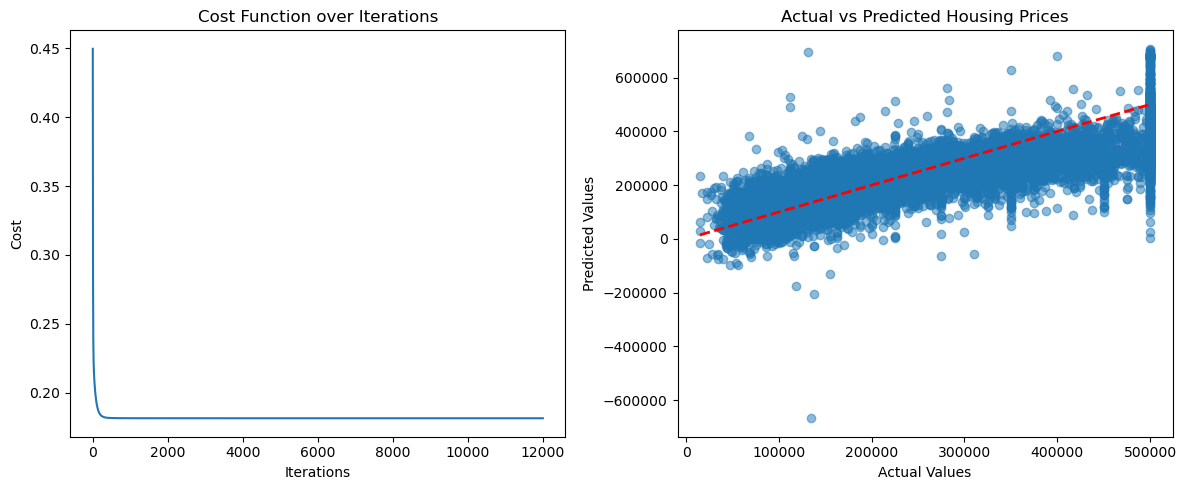

In [255]:
if __name__ == "__main__":
    url = "Datasets/housing.csv"
    try:
        housing = pd.read_csv(url)
        housing = housing.drop(columns=["ocean_proximity"])
        
        housing = housing.dropna()
        
        X = housing.drop(columns=['median_house_value']).values
        Y = housing['median_house_value'].values
        
        
    except Exception as e:
        print(f"Error loading data: {e}")
        exit()

    model = LinearRegressionMult()
    w_final, b_final, J_hist = model.fit(X, Y, alpha=0.1, attempts=12000, lambda_=0.1)
    print(f"\nFinal w: {model.w}")
    print(f"Final b: {model.b:.8f}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(J_hist)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')

    plt.subplot(1, 2, 2)
    predictions = model.predict(X)
    plt.scatter(Y, predictions, alpha=0.5)
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Housing Prices')

    plt.tight_layout()
    plt.show()
